## EDA

### Columns Description

- age. Age of primary beneficiary (numeric)

- sex. Gender of primary beneficiary (categorical)

- bmi. Body mass index (numeric)

- children. Number of children/dependents covered by the health insurance (numerical)

- smoker. smoker (categorical)

- region. Beneficiary's residential area in the USA: northeast, southeast, southwest, 
northwest (categorical)

- charges. Health insurance premium (numerical)

### Multivariable Analysis

In [2]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/home/tr4shhh/Proyects/4geeks/14-Linear_Regression/linear-regression/data/interim/medical_without_duplicates.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


#### Categorical - Categorical

In [4]:
#Nos quedamos solo con las variables categoricas 
categoricas = df.select_dtypes(include='object')

In [5]:
categoricas

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1332,male,no,northwest
1333,female,no,northeast
1334,female,no,southeast
1335,female,no,southwest


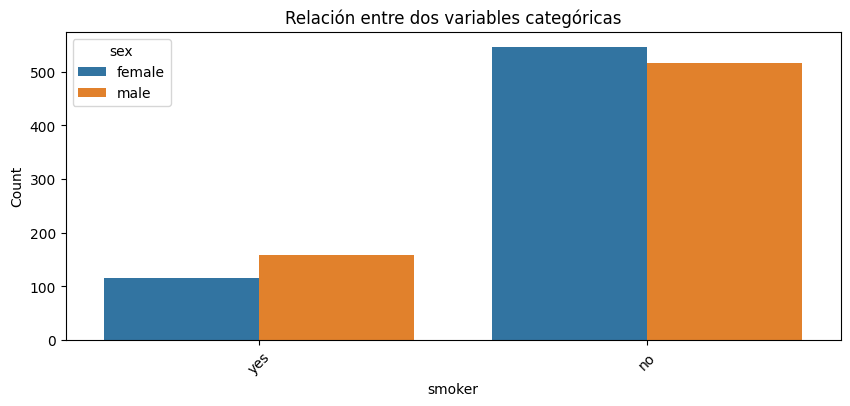

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Columnas a comparar
x_1 = 'smoker'
hue_1 = 'sex'

dodge_plot = True

#Tamaño del grafico
plt.figure(figsize=(10, 4))

# Crear un gráfico de barras apiladas
sns.countplot(x=x_1, hue=hue_1, data=categoricas, dodge=dodge_plot)

# Girar las letras 45 grados
plt.xticks(rotation=45)

# Añadir etiquetas a los ejes y un título
plt.xlabel(x_1)
plt.ylabel('Count')
plt.title('Relación entre dos variables categóricas')

# Mostrar el gráfico
plt.show()

#### Categorical - Numerical

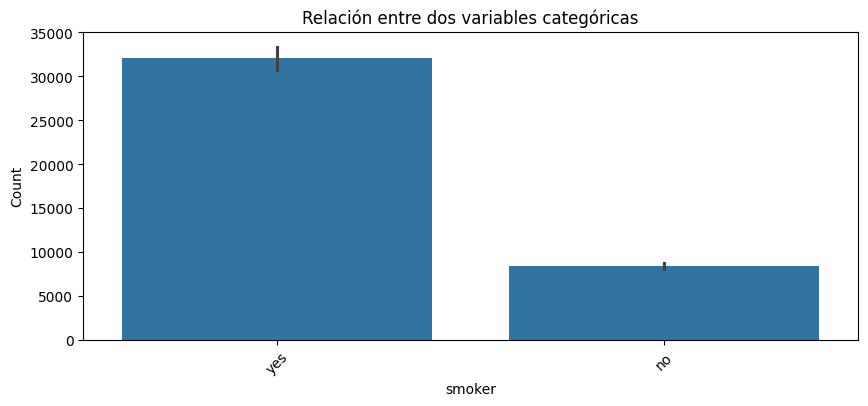

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Columnas a comparar
x_cat = 'smoker'
y_num = 'charges'

hue_cat = ''


#Tamaño del grafico
plt.figure(figsize=(10, 4))

#Crea un grafico de barras por valor

if hue_cat != '':
    sns.barplot(data = df, x = x_cat, y = y_num, hue = hue_cat, errorbar=('ci', 95))
else:
    sns.barplot(data = df, x = x_cat, y = y_num, errorbar=('ci', 95))


# Girar las letras 45 grados
plt.xticks(rotation=45)

# Invertir el eje y
# plt.gca().invert_yaxis()

# Añadir etiquetas a los ejes y un título
plt.xlabel(x_1)
plt.ylabel('Count')
plt.title('Relación entre dos variables categóricas')

# Mostrar el gráfico
plt.show()

- Insurance charges are higher if the person smokes.

##### Factorize Categorical Variables

In [8]:
for c in categoricas:

    df[f'{c}_n'] = pd.factorize(df[c])[0]


In [28]:
for c in categoricas:
    df[f'{c}_n'] = pd.factorize(df[c])[0]

    # Imprimir los valores únicos y sus correspondientes números asignados
    print(f'Valores únicos en {c}: {df[c].unique()}')
    print(f'Números asignados en {c}_n: {df[f"{c}_n"].unique()}')
    print('\n')

Valores únicos en sex: ['female' 'male']
Números asignados en sex_n: [0 1]


Valores únicos en smoker: ['yes' 'no']
Números asignados en smoker_n: [0 1]


Valores únicos en region: ['southwest' 'southeast' 'northwest' 'northeast']
Números asignados en region_n: [0 1 2 3]




In [29]:
#Invierte de 0 a 1 y de 1 a 0 en una columna

df['smoker_n'] = 1 - df['smoker_n']

In [30]:
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,0,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,0,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,0,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,0,0


In [31]:
all_numericas = df.select_dtypes(include='number')

In [32]:
all_numericas

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,2
4,32,28.880,0,3866.85520,1,0,2
...,...,...,...,...,...,...,...
1332,50,30.970,3,10600.54830,1,0,2
1333,18,31.920,0,2205.98080,0,0,3
1334,18,36.850,0,1629.83350,0,0,1
1335,21,25.800,0,2007.94500,0,0,0


#### Numerical - Numerical

In [33]:
all_numericas.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n'], dtype='object')

<Axes: label='a2'>

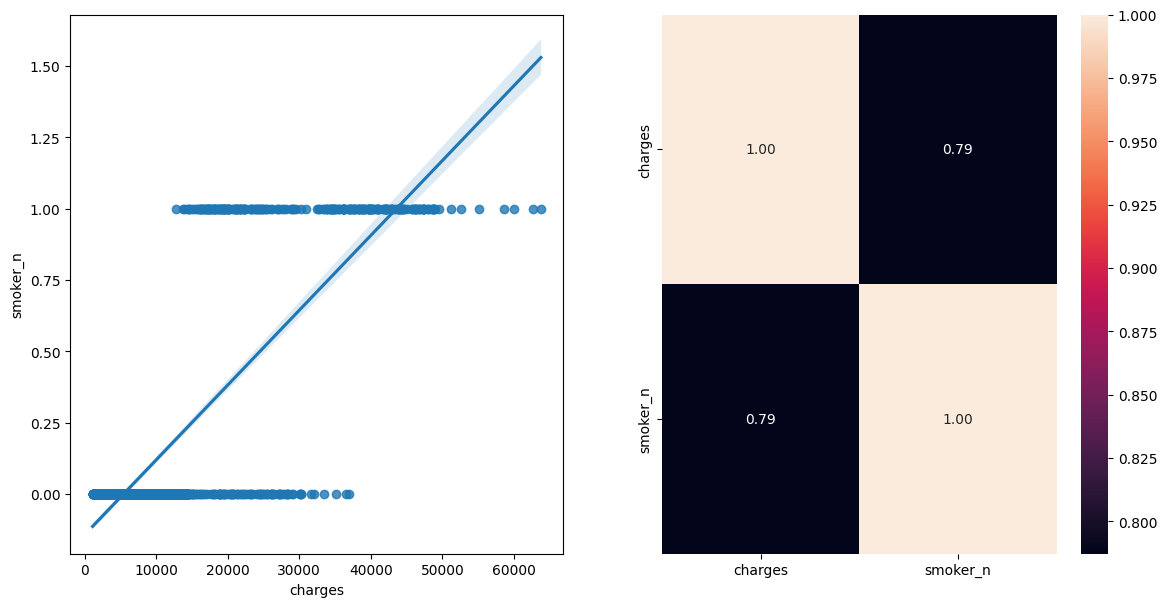

In [34]:
#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'charges'
y_1 = 'smoker_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


According to our logic, smokers have much higher insurance burdens.

<Axes: label='a2'>

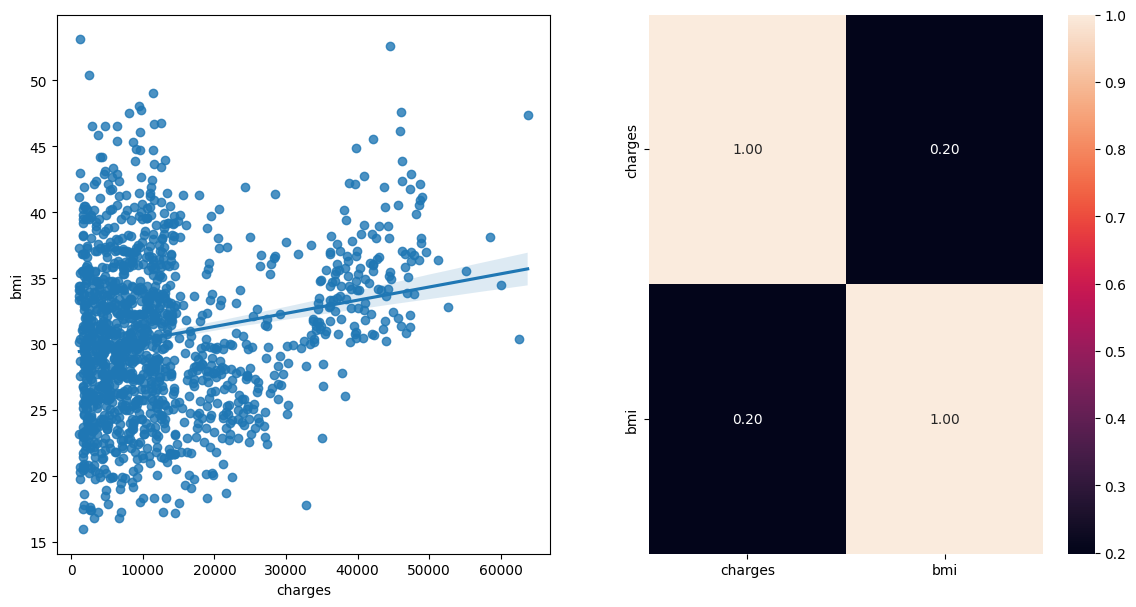

In [35]:
#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'charges'
y_1 = 'bmi'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])

bmi has no correlation with insurance charges...

<Axes: label='a2'>

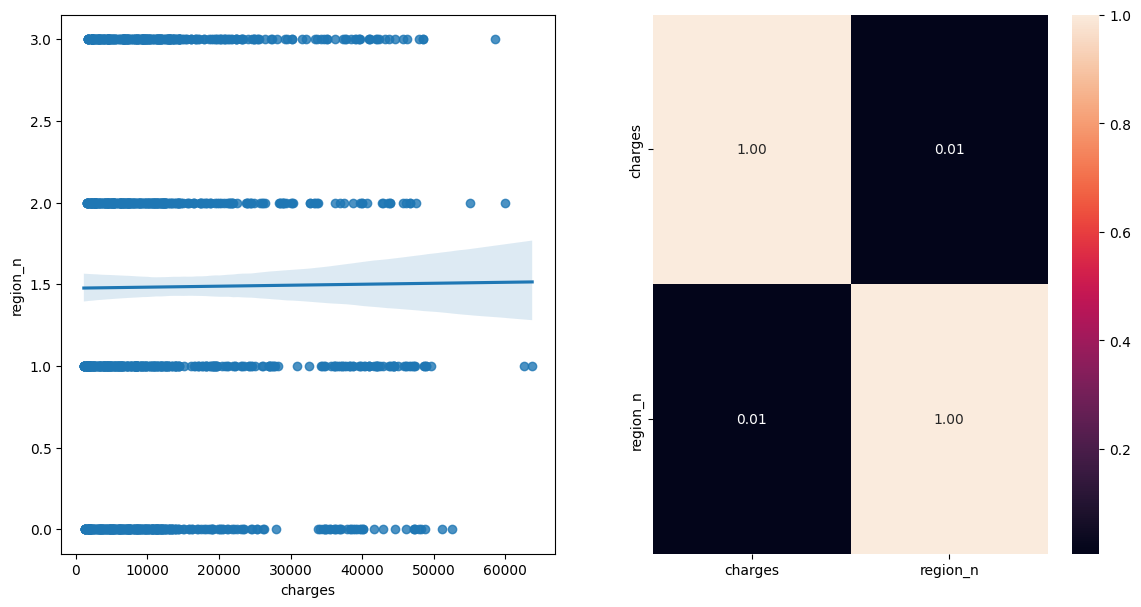

In [36]:
#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'charges'
y_1 = 'region_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])

...neither the region where you live

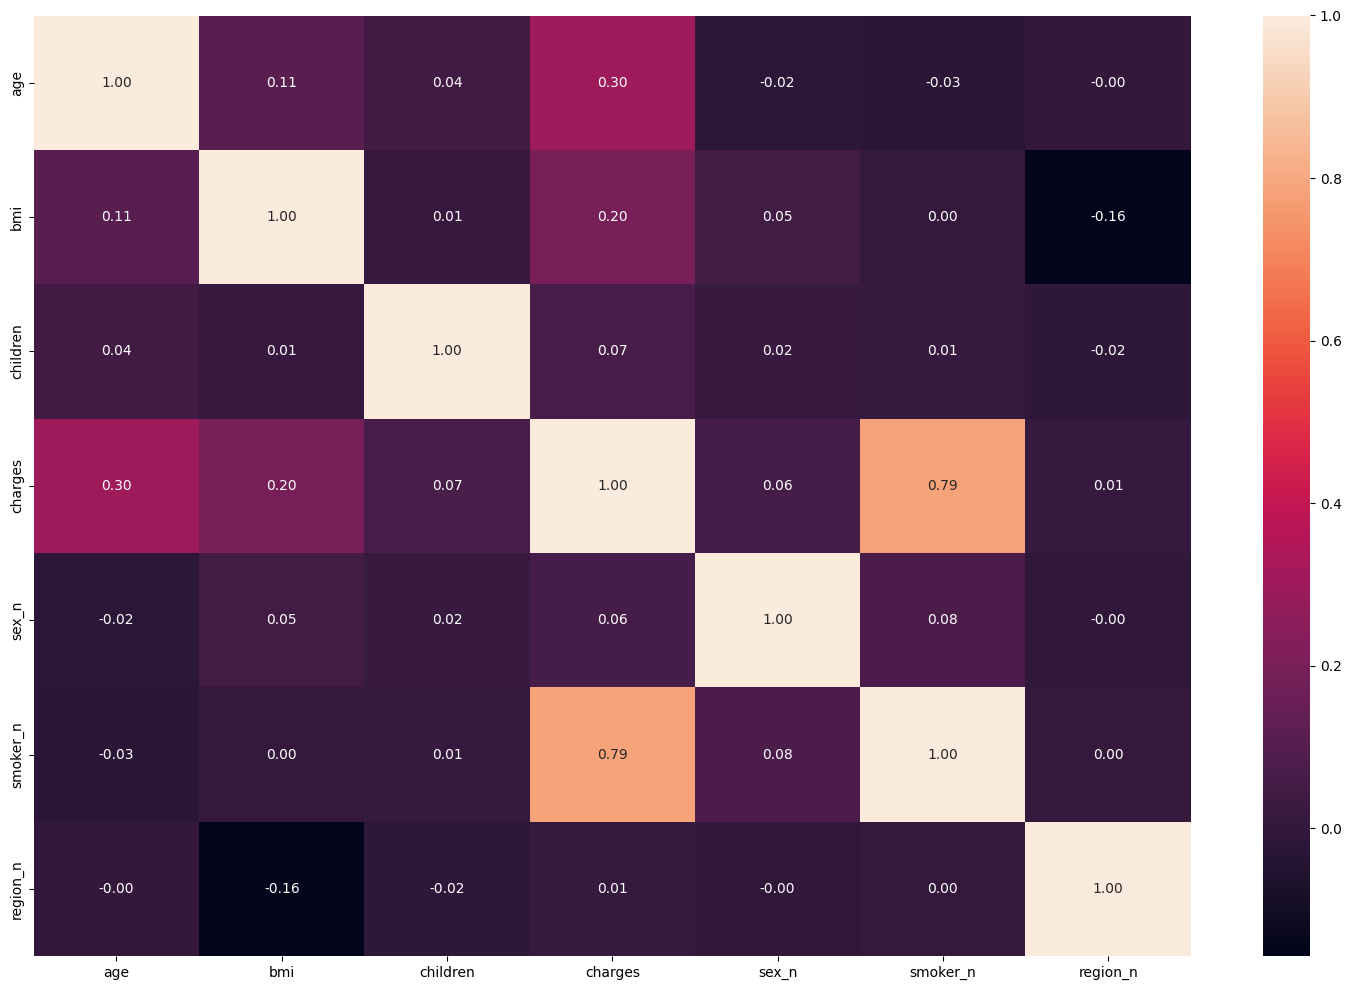

In [37]:
#Creamos el heatmap

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((all_numericas.corr()), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

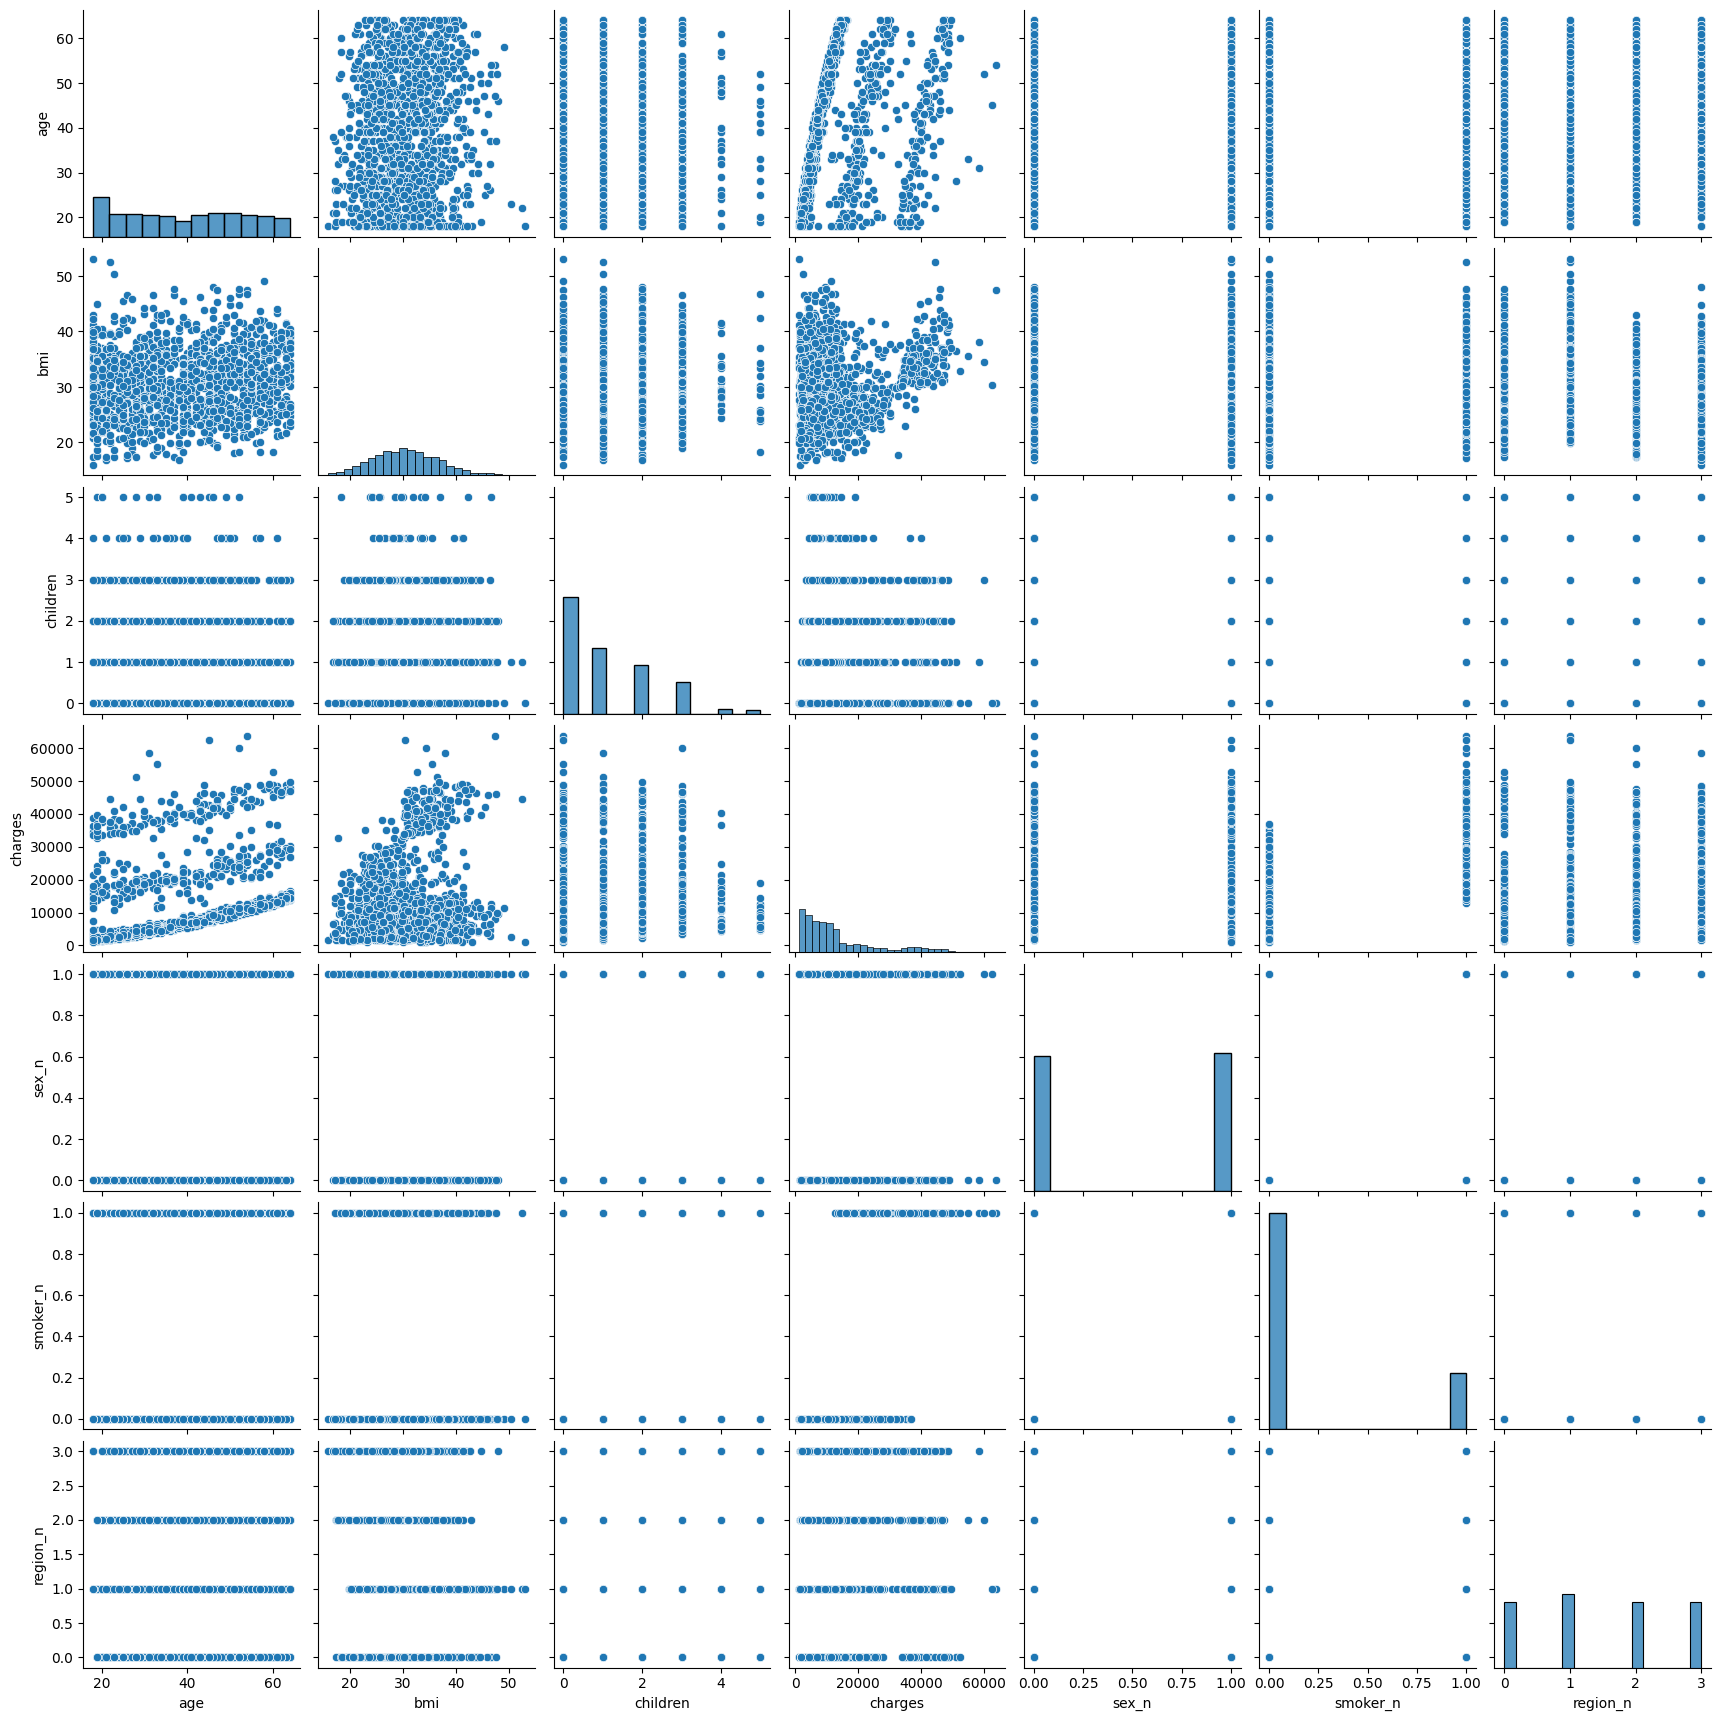

In [38]:
#Creamos el pairplot

sns.pairplot(df, diag_kind="hist")

### Outliers Analysis

We think that a bmi higher than 40 is not reasonable because it would be morbid obesity and we see how many we have in our dataset:

In [39]:
import pandas as pd


dataframe = df
valor_outlier = 40
columna_outlier = 'bmi'
outliers_arriba = True



filas_dataframe = len(dataframe)

if outliers_arriba:

    #Contamos el total de outliers
    total_outliers = dataframe[dataframe[columna_outlier] > valor_outlier].count()
    total_outliers_count = total_outliers.iloc[0]

    #Calculamos el porcentaje de outliers
    porcentaje_outlier = total_outliers_count / len(dataframe) * 100
    print(f'El numero de outliers en {columna_outlier} que tenemos sobre {valor_outlier} es {total_outliers_count} valores')
    print(f'Siendo el {porcentaje_outlier:.2f}% de nuestro dataset de {len(dataframe)} filas')
    print(f'Al eliminarlas quedariamos con {filas_dataframe - total_outliers_count} filas')

else:

    #Contamos el total de outliers
    total_outliers = dataframe[dataframe[columna_outlier] < valor_outlier].count()
    total_outliers_count = total_outliers.iloc[0]

    #Calculamos el porcentaje de outliers
    porcentaje_outlier = total_outliers_count / len(dataframe) * 100
    print(f'El numero de outliers en {columna_outlier} que tenemos bajo {valor_outlier} es {total_outliers_count} valores')
    print(f'Siendo el {porcentaje_outlier:.2f}% de nuestro dataset de {filas_dataframe} filas')
    print(f'Al eliminarlas quedariamos con {filas_dataframe - total_outliers_count} filas')


El numero de outliers en bmi que tenemos sobre 40 es 91 valores
Siendo el 6.81% de nuestro dataset de 1337 filas
Al eliminarlas quedariamos con 1246 filas


In [40]:
import pandas as pd

valor_outlier = 40
columna_outlier = 'bmi'

# Eliminamos los outliers cuando consideremos
df_sin_outliers = df[df[columna_outlier] <= valor_outlier]


In [41]:
df_sin_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,0,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,0,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,0,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,0,0


In [42]:
# A csv

df_sin_outliers.to_csv('../data/interim/medical_df_sin_outliers.csv', index=False)

### Train - Test Split

In [43]:
all_numericas = df_sin_outliers.select_dtypes(include='number')

In [44]:
all_numericas

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,2
4,32,28.880,0,3866.85520,1,0,2
...,...,...,...,...,...,...,...
1332,50,30.970,3,10600.54830,1,0,2
1333,18,31.920,0,2205.98080,0,0,3
1334,18,36.850,0,1629.83350,0,0,1
1335,21,25.800,0,2007.94500,0,0,0


In [45]:
#Dividimos en Train - Tests / Predictoras - Target

from sklearn.model_selection import train_test_split

size_test= 0.2
target = 'charges'

X = all_numericas.drop(target,axis=1)
y = all_numericas[target]

# Usar stratify solo en clasificación, nunca en regresión
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = size_test, random_state = 42)


### Feature scaling (Normalization)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Guardamos las columnas
X_train_columns = X_train.columns
X_test_columns = X_test.columns

#Normalizamos las predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Guardamos los datos normalizados con sus columnas y sus indices
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_train_columns)


In [48]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = scaler

ruta_guardado = '../models/scaler.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

In [49]:
# save as csv

# Con Index = False, no guardamos el indice en el archivo resultante
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
X_train_scaled.to_csv("../data/processed/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("../data/processed/X_test_scaled.csv", index=False)

y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)
